___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
#Importing the importing libraries
import numpy as np
import pandas as pd
#Importing matplotlib for graphing
import matplotlib.pyplot as plt
#Importing seaborn for advanced graphing
import seaborn as sns
#Importing tensoflow
import tensorflow as tf

import os

#Importing the dataset to use it
from tensorflow.keras.datasets import fashion_mnist

#Importing to_categorical from tensorflow to convert something to one-hot encoded for categorical analysis 
from tensorflow.keras.utils import to_categorical

#Importing the model libraries from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#Importing EarlyStopping to use it for stopping at a point
from tensorflow.keras.callbacks import EarlyStopping

#Importing the evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

plt.rcParams["figure.figsize"] = (10, 8)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

np.set_printoptions(suppress=True)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
#Using the data from fashion_mnist and assign x_train, y_train, x_test, y_test and load it
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
#Printing x_train dataset
print(f"There are {len(x_train)} images in the training dataset")
#Printing x_test dataset
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [4]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [5]:
# Checking the shape of one image
x_train[50].shape

(28, 28)

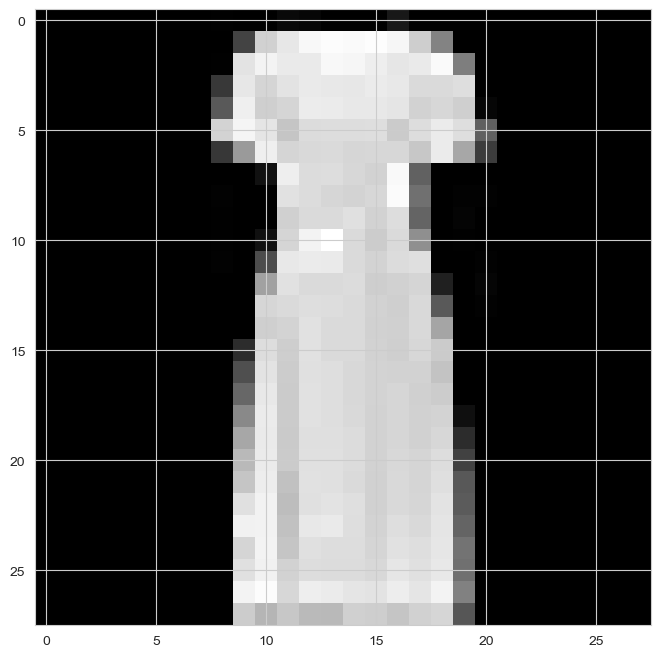

In [6]:
#Ploting the 50 image
plt.imshow(x_train[50], cmap="gray")
plt.show()

<Axes: >

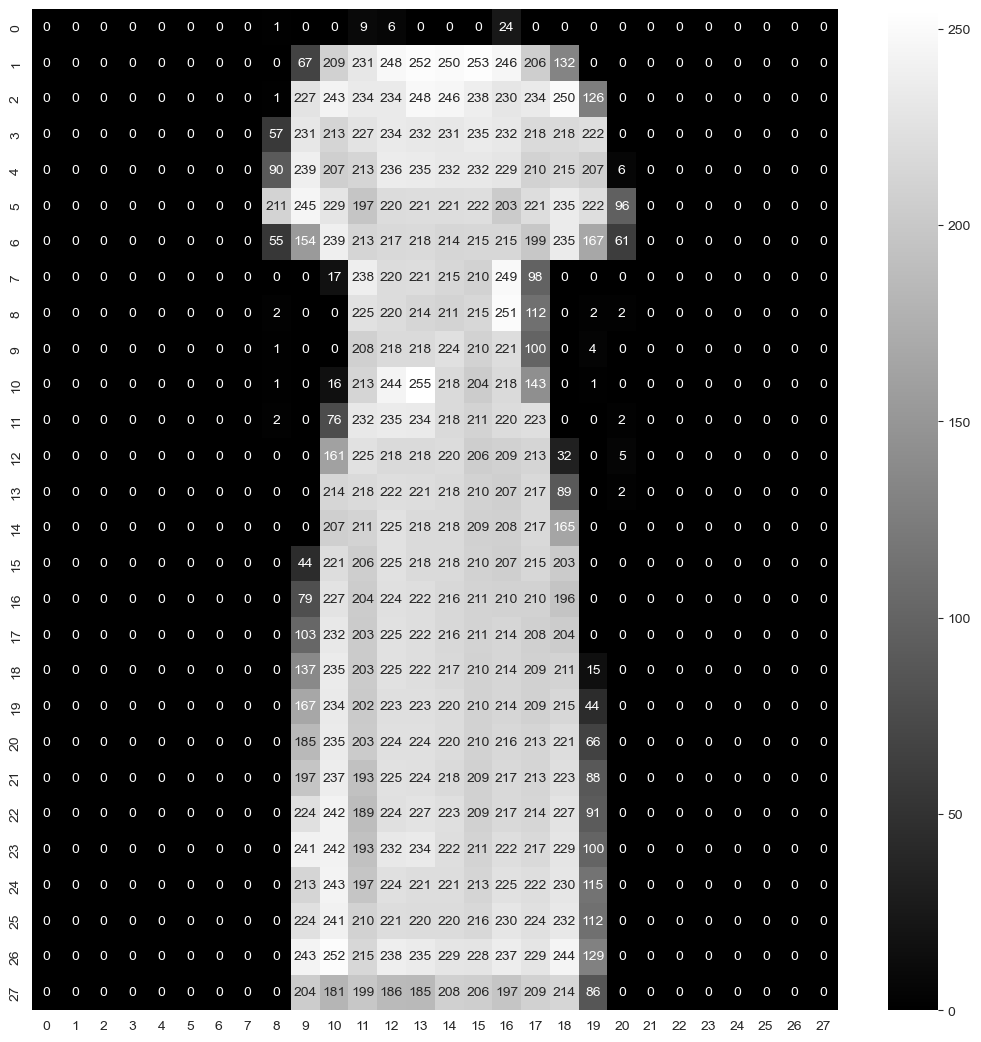

In [7]:
#Seeing the image through the heatmap
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[50], annot=True, cmap="gray", fmt=".3g")
plt.show()

In [8]:
# Checking the shape of one image
x_train[8].shape

(28, 28)

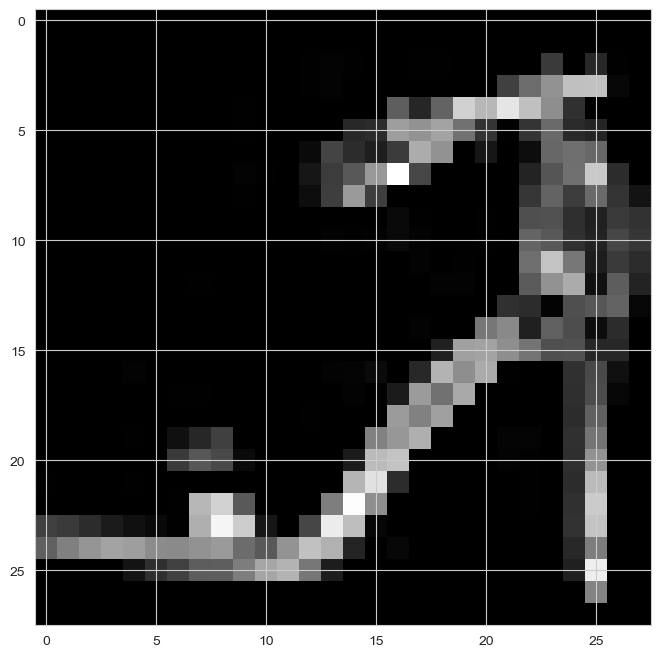

In [9]:
#Seeing the 8 image
plt.imshow(x_train[8], cmap="gray")

<Axes: >

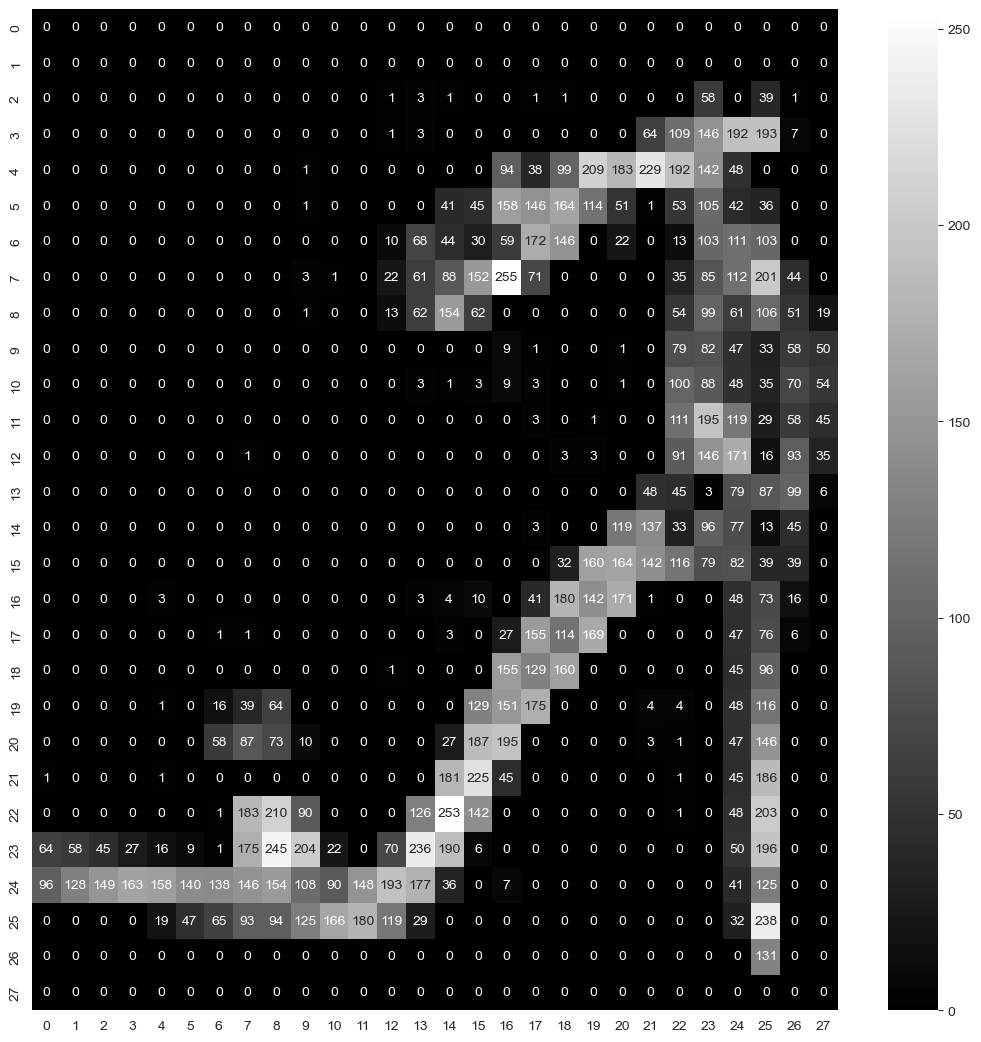

In [10]:
#Seeing the 8 image through the headmap
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[8], annot=True, cmap="gray", fmt=".3g")

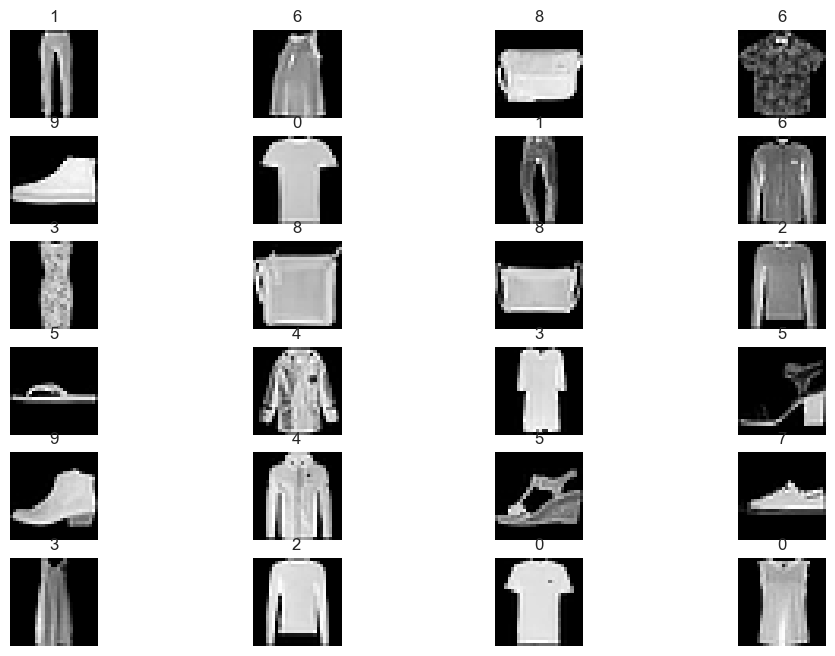

In [15]:
#Seeing different images 
c, clo = plt.subplots(6, 4, figsize=(12, 8))

for fa in clo.ravel():
    f = np.random.randint(0, len(x_train))
    fa.axis("off")
    fa.set_title(y_train[f])
    fa.imshow(x_train[f], cmap="gray")
plt.show()

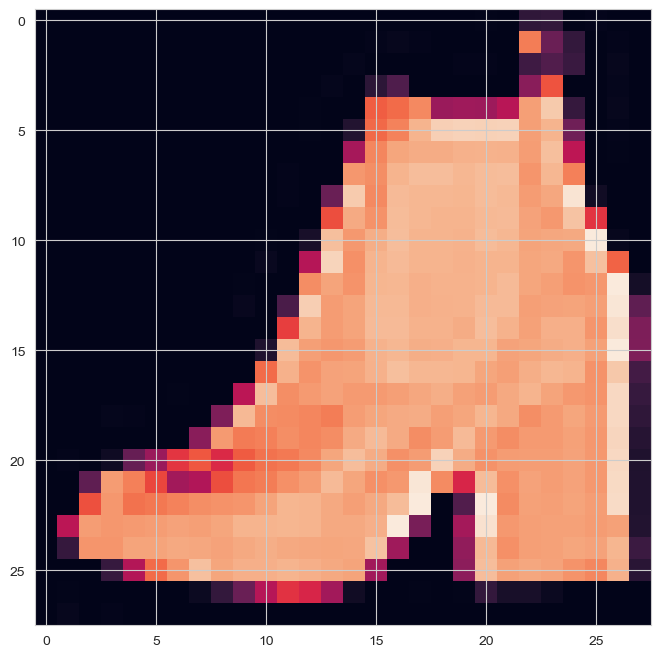

In [14]:
#Ploting the 800 image
plt.imshow(x_train[800])

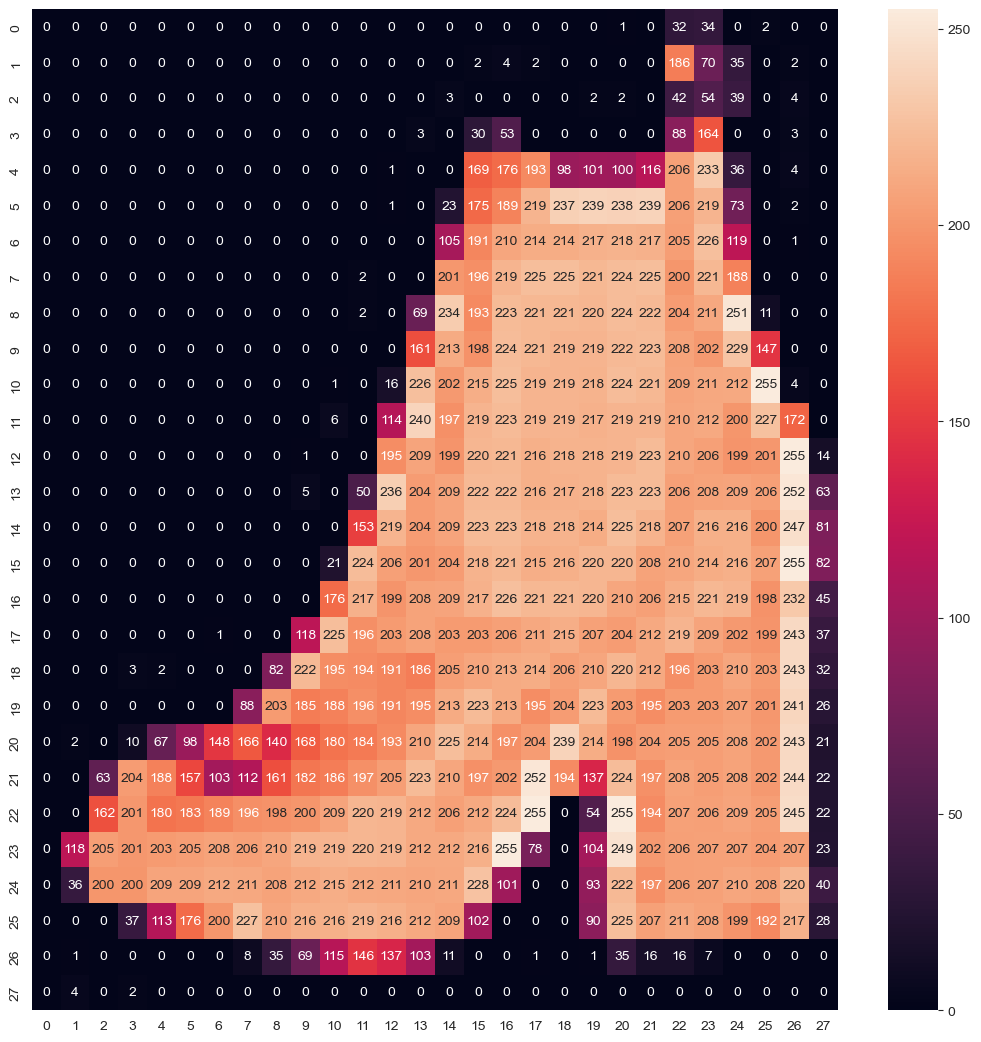

In [16]:
#Seeing the image through the heatmap
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[800], annot=True, fmt=".3g")
plt.show()

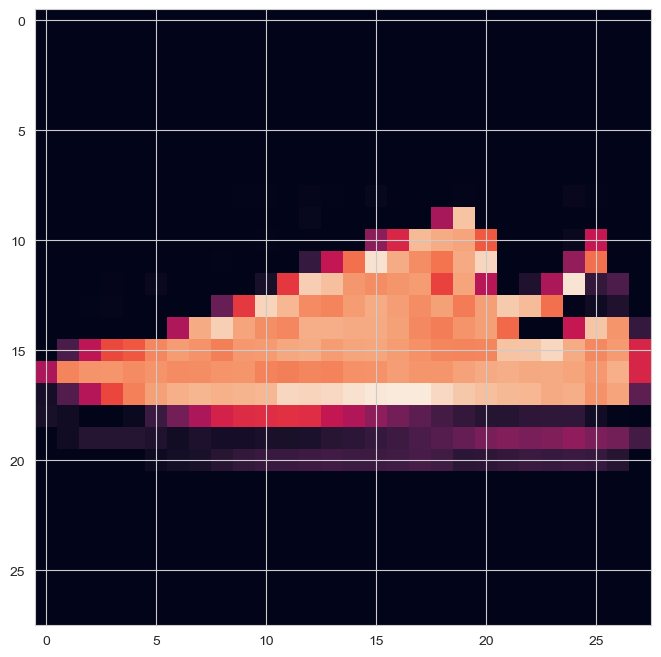

In [17]:
#Ploting the 6 image
plt.imshow(x_train[6])

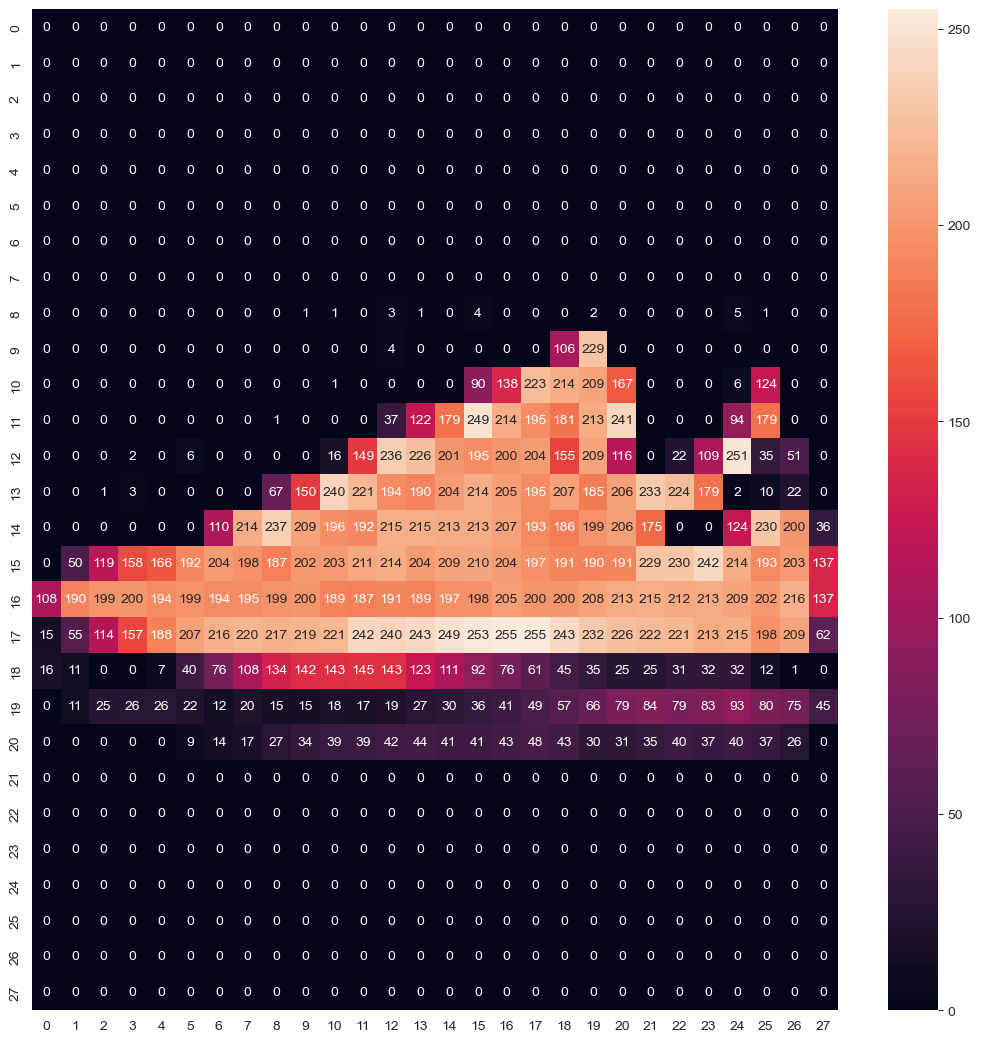

In [18]:
#Seeing the image through the heatmap
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[6], annot=True, fmt=".3g")
plt.show()

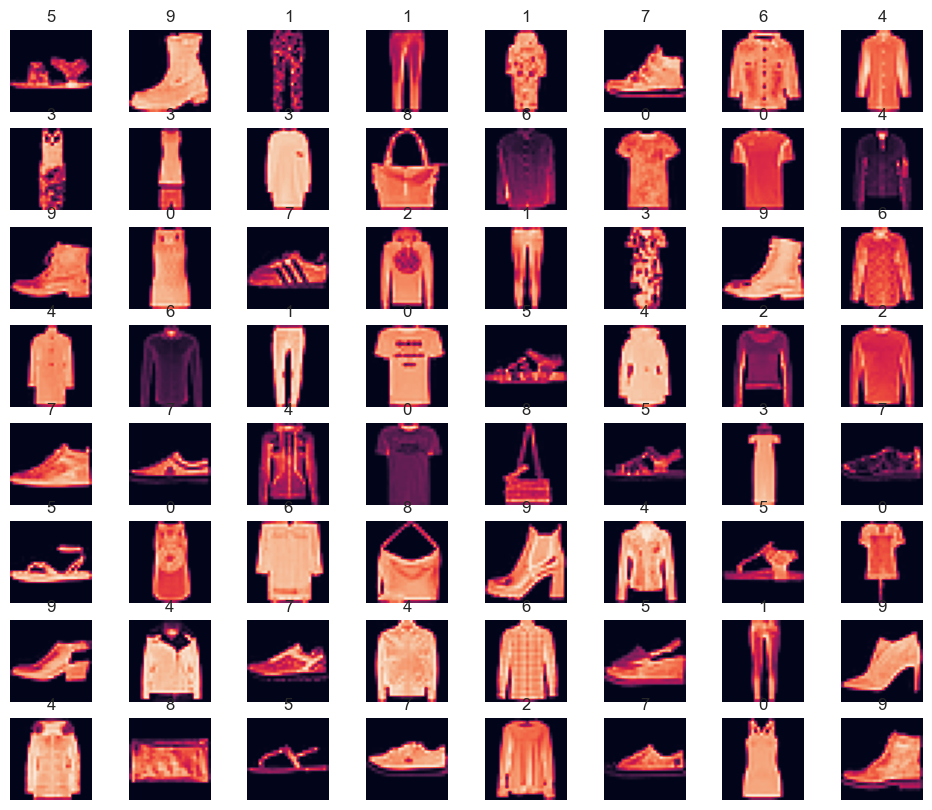

In [20]:
#Seeing different images 
c, clo = plt.subplots(8, 8, figsize=(12, 10))

for fa in clo.ravel():
    f = np.random.randint(0, len(x_train))
    fa.axis("off")
    fa.set_title(y_train[f])
    fa.imshow(x_train[f])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [21]:
#Seeing the min value of one of the values
x_train[400].min()
#As we can see, the min value is 0

0

In [22]:
#Seeing the max value of one of the values
x_train[20].max()
#As we can see, the max value is 255

255

In [23]:
# Now, I can normalize image pixels, by dividing the x_train and x_test by the max value
#Before dividing, i have to change their type to float

#Changing the type of x_train
x_train = x_train.astype("float32")
#Changing the type of x_test
x_test = x_test.astype("float32")

#Normalize x_train
x_train /= 255

#Normalize x_test
x_test /= 255

In [24]:
#Seeing the x_train after normalizing
x_train
#As we can see, it is normalized now

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [25]:
#Seeing the x_test after normalizing
x_test
#As we can see, it is normalized now

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [26]:
#Now, let's check one of the images
print('The min value is: ', x_train[100].min())
print('The max value is: ', x_train[100].max())
#As we can see, the min valu is 0, and the max value is 1 now after normalizing

The min value is:  0.0
The max value is:  1.0


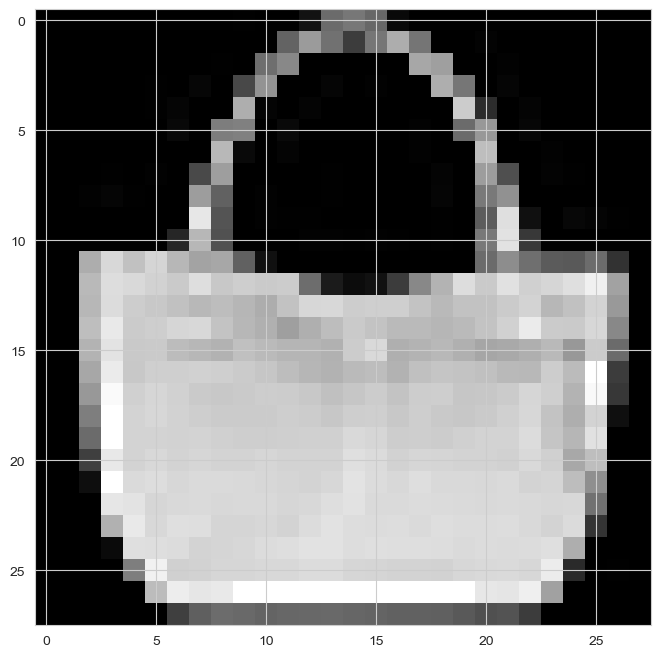

In [27]:
#Let's check if the image has affected after normalizing or not
plt.imshow(x_train[100], cmap="gray")
plt.show()
#As we can see, the image is fine

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [28]:
#Let's see the shape of x_train and x_test
x_train.shape, x_test.shape
#As we can see, the shape now contains only 3 dimension

((60000, 28, 28), (10000, 28, 28))

In [29]:
np.expand_dims(x_train, 3).shape

(60000, 28, 28, 1)

In [30]:
#let's change the shape of x_train by using numpy array. We can use expand_dims to do so
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

In [31]:
#Now, let's check if it chaged or not
x_train.shape, x_test.shape
#As we can see, the shape now is 4 dim. 

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [32]:
#Let's fist see y_train
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [33]:
#Let's see the shape of y_train
print('The shape of y_train is: ', y_train.shape)
#As we can see the shape is (60000,)

The shape of y_train is:  (60000,)


In [34]:
#Let's fist see y_test
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [35]:
#Let's see the shape of y_test
print('The shape of y_test is: ', y_test.shape)
#As we can see the shape is (10000,)

The shape of y_test is:  (10000,)


In [36]:
#Now, let's use to_categorical to convert y_train and y_test. Also, renaming them
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [37]:
#Let's see the shape of the new Y_train and Y_test
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [38]:
#Let's take a value and see it before converting
y_train[400]

2

In [39]:
#Let's take a value and see it after converting
Y_train[400]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [40]:
#Let's now create the model

#using Sequential() to create the model
clothes_model = Sequential()

#Adding the 2D Convolutional Layer to the model, then using a filter of 28,  kernel_size=(3,3)
clothes_model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
) 

#Adding the pool_size of (2,2) strides of (1,1) to the model
clothes_model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1))) 

#Adding a flatten to the model
clothes_model.add(Flatten())

#Adding 128 Neurons and relu to the actibation
clothes_model.add(Dense(128, activation="relu"))

#For the final layer, adding 10 Neurons and a softmax activation
clothes_model.add(Dense(10, activation="softmax"))

#Compiling the model, putting categorical_crossentropy to the loss, rmsprop to optimizer, and accuracy to metrics
clothes_model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [41]:
#Seeing the summary of the model
clothes_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [42]:
#Creating an early stop 
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

In [43]:
#Fitting the model and using early stopping on it 
clothes_model.fit(
    x_train,
    Y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3923 - accuracy: 0.8612 - val_loss: 0.3095 - val_accuracy: 0.8902
Epoch 2/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2616 - accuracy: 0.9046 - val_loss: 0.3154 - val_accuracy: 0.8826
Epoch 3/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2172 - accuracy: 0.9196 - val_loss: 0.2699 - val_accuracy: 0.9061
Epoch 4/50
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1896 - accuracy: 0.9305 - val_loss: 0.2952 - val_accuracy: 0.9009
Epoch 5/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1663 - accuracy: 0.9399 - val_loss: 0.2740 - val_accuracy: 0.9076
Epoch 6/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1476 - accuracy: 0.9460 - val_loss: 0.2914 - val_accuracy: 0.9049
Epoch 7/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1296 - accuracy: 0.9545 - val_loss: 0.2959 -

In [44]:
#The shape of x_train
x_train.shape

(60000, 28, 28, 1)

In [45]:
#The shape of Y_train
Y_train.shape

(60000, 10)

**TASK 7: Plot values of metrics you used in your model.**

In [46]:
#Seeing the metrics of the model
clothes_model.metrics_names

['loss', 'accuracy']

In [47]:
#Seeing the history of the model
clothes_model.history.history

{'loss': [0.3922514021396637,
  0.2615700364112854,
  0.21721915900707245,
  0.18959124386310577,
  0.16629505157470703,
  0.1476016342639923,
  0.12955309450626373,
  0.11495128273963928,
  0.10187861323356628,
  0.0918683260679245,
  0.08242734521627426,
  0.07332023978233337,
  0.06609859317541122],
 'accuracy': [0.8611666560173035,
  0.9046499729156494,
  0.9196333289146423,
  0.9304666519165039,
  0.9399166703224182,
  0.9459666609764099,
  0.9545166492462158,
  0.9592499732971191,
  0.9628166556358337,
  0.9671333432197571,
  0.9707666635513306,
  0.973966658115387,
  0.9776666760444641],
 'val_loss': [0.30953577160835266,
  0.31536558270454407,
  0.26994287967681885,
  0.2952072024345398,
  0.27404823899269104,
  0.29143914580345154,
  0.2959428131580353,
  0.3113223612308502,
  0.30437543988227844,
  0.36387425661087036,
  0.40550485253334045,
  0.3896385431289673,
  0.4126735329627991],
 'val_accuracy': [0.8902000188827515,
  0.8826000094413757,
  0.9060999751091003,
  0.90090

In [48]:
#Creating a dataframe of the history of the model
history = pd.DataFrame(clothes_model.history.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.392,0.861,0.310,0.890
1,0.262,0.905,0.315,0.883
2,0.217,0.920,0.270,0.906
3,0.190,0.930,0.295,0.901
4,0.166,0.940,0.274,0.908


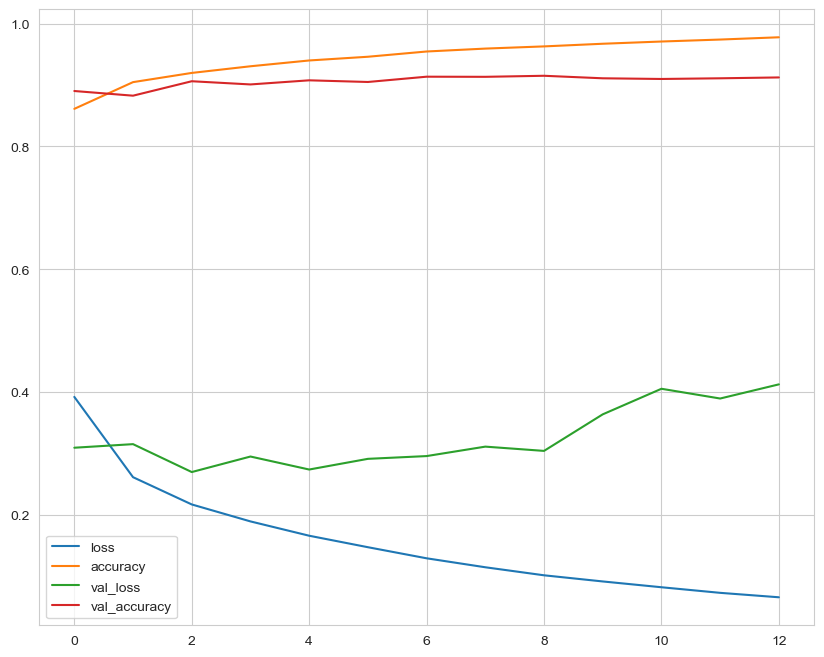

In [49]:
#Plotting the history of the model
history.plot();

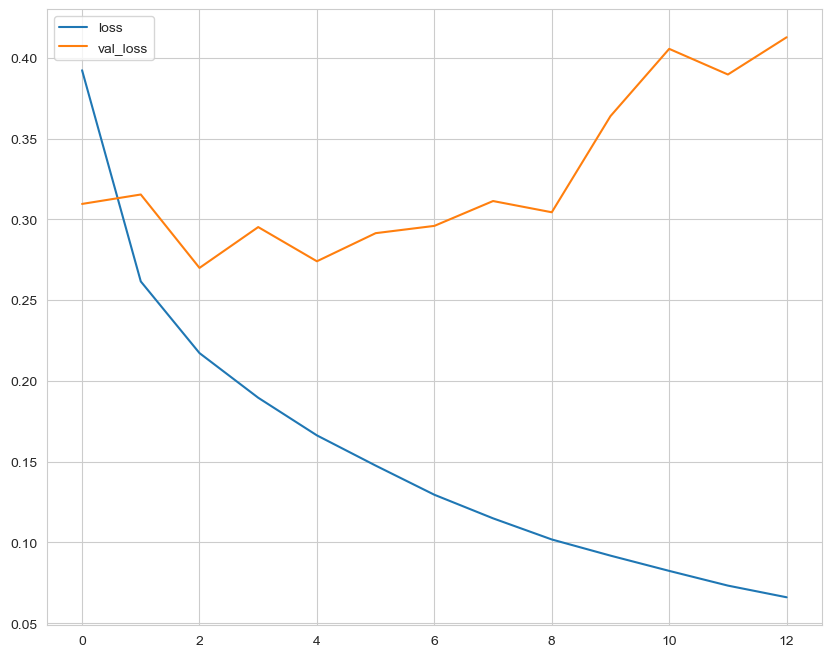

In [50]:
#Seeing loss and val_loss from the graph
history[["loss", "val_loss"]].plot()
plt.show()

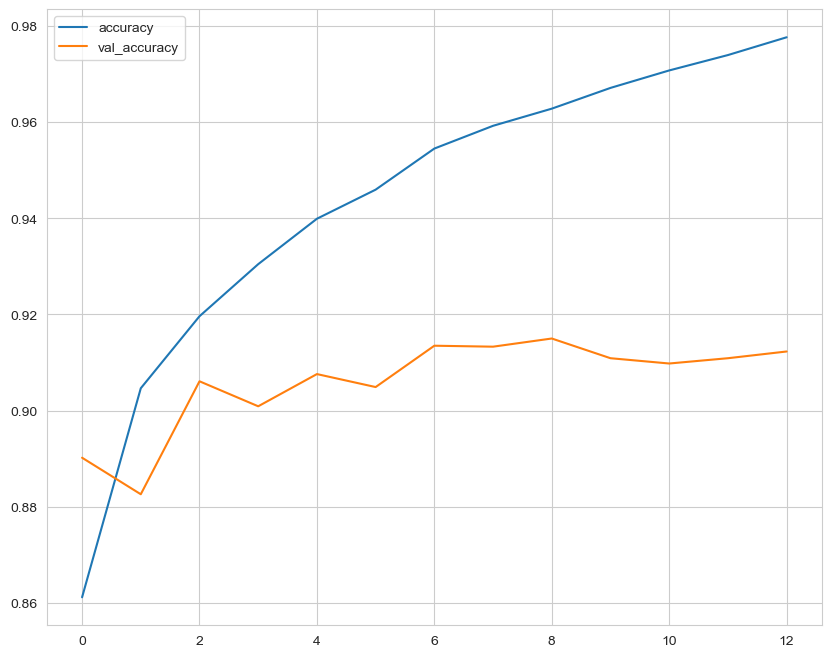

In [51]:
#Seeing the accuracy and val_accuracy from the graph
history[["accuracy", "val_accuracy"]].plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [52]:
#Evaluating the model of x_test and Y_test
clothes_model.evaluate(x_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3044 - accuracy: 0.9150


[0.30437543988227844, 0.9150000214576721]

In [53]:
#Seeing the scores of the model
model_score = clothes_model.evaluate(x_test, Y_test, verbose=0)
print("Test loss:", model_score[0])
print("Test accuracy:", model_score[1])

Test loss: 0.30437543988227844
Test accuracy: 0.9150000214576721


In [54]:
#Seeing the predicted values of the model
pred = clothes_model.predict(x_test)
pred

313/313 [==============================] - 2s 4ms/step


array([[0.        , 0.        , 0.00000011, ..., 0.00001454, 0.        ,
        0.99998355],
       [0.0000002 , 0.        , 0.99999976, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00022282, 0.00000083, 0.00019171, ..., 0.09069613, 0.00014507,
        0.00291479]], dtype=float32)

In [55]:
#Seeing the shape of the predicted values
pred.shape

(10000, 10)

In [56]:
#Seeing the first value of the predicted value
pred[0]

array([0.        , 0.        , 0.00000011, 0.        , 0.        ,
       0.00000175, 0.        , 0.00001454, 0.        , 0.99998355],
      dtype=float32)

In [57]:
np.argmax(pred[0])

9

In [58]:
y_pred = np.argmax(pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [59]:
#The shape of y_pred
y_pred.shape

(10000,)

In [60]:
#Printing the classification_report of y_test and y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.84      0.86      1000
           3       0.92      0.92      0.92      1000
           4       0.87      0.87      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.78      0.77      1000
           7       0.96      0.96      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [61]:
#Printing the confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[856   0  22  15   3   0  95   0   9   0]
 [  0 983   0  12   0   0   2   0   3   0]
 [ 17   0 842   8  56   0  76   0   1   0]
 [ 13   7  10 920  27   0  19   0   4   0]
 [  0   1  48  21 873   0  54   0   3   0]
 [  0   0   0   0   0 979   0  10   0  11]
 [ 95   1  41  23  49   0 781   0  10   0]
 [  0   0   0   0   0   8   0 965   0  27]
 [  2   1   2   4   0   1   3   2 985   0]
 [  1   0   0   0   0   7   0  26   0 966]]


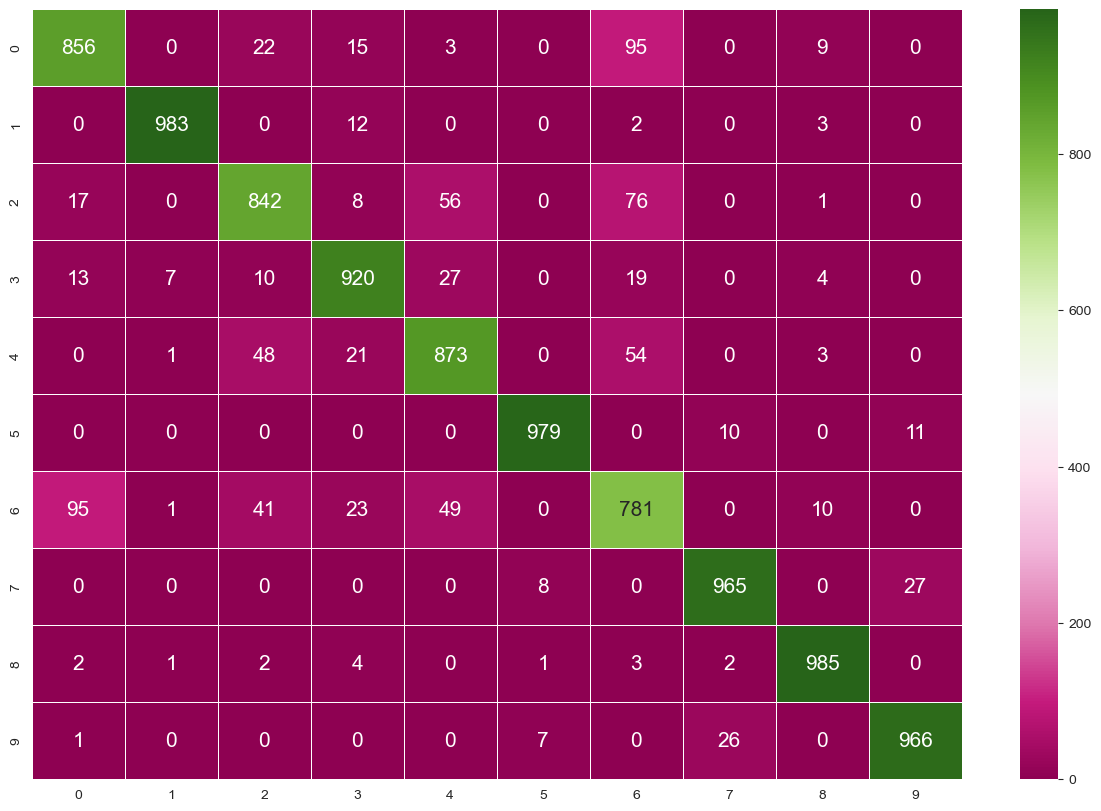

In [62]:
#Plotting the confusion_matrix by using the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="PiYG",
    linewidths=0.5,
    linecolor="white",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [63]:
#Seeing the values that predicted wrong
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [64]:
#Seeing the sum of the values that predicted wrong
np.not_equal(y_test, y_pred).sum()

850

In [65]:
#Seeing the values that predicted correct
np.equal(y_test, y_pred).sum()

9150

## Prediction

In [66]:
#Creating a value to predict
fashion = x_test[9]

In [67]:
#Seeing the shape of the value
fashion.shape

(28, 28, 1)

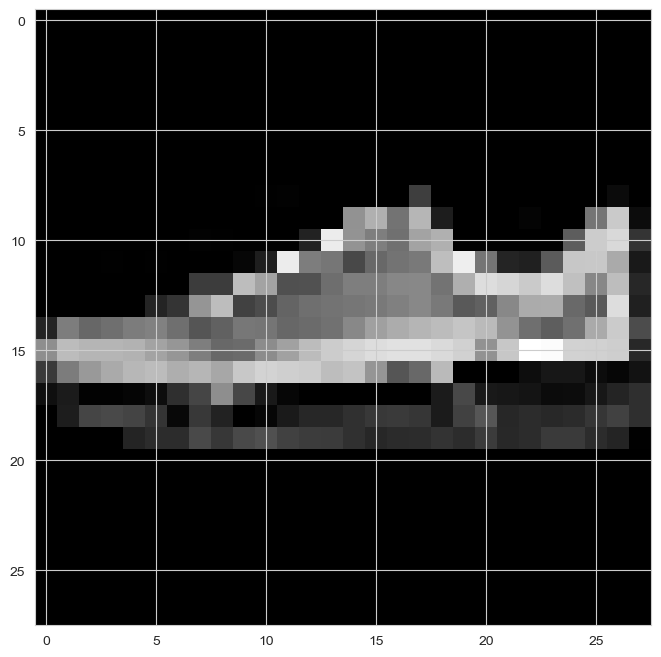

In [68]:
#Plotting the value
plt.imshow(fashion, cmap="gray")
plt.show()

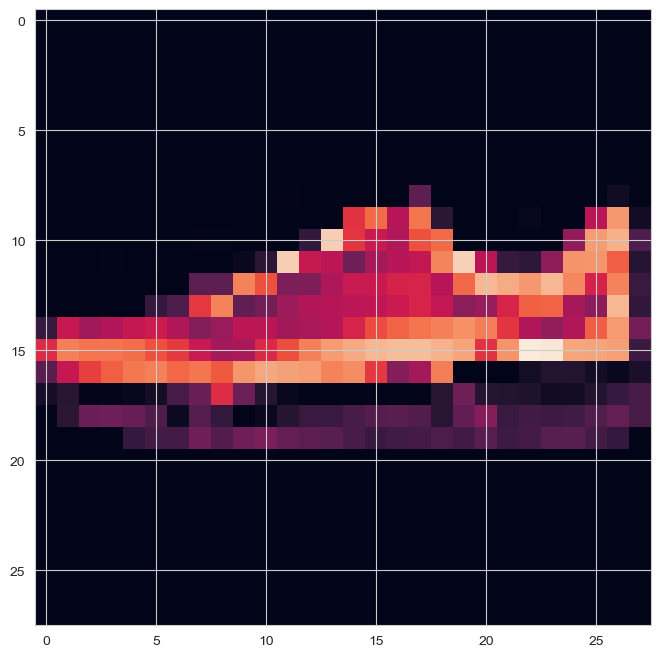

In [69]:
#Plotting the value
plt.imshow(fashion)
plt.show()

In [70]:
#Changing the dim of the value
np.expand_dims(fashion, 0).shape

(1, 28, 28, 1)

In [73]:
#Predicting the value
pred_fashion = clothes_model.predict(np.expand_dims(fashion, 0))
pred_fashion

1/1 [==============================] - 0s 18ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [74]:
y_pred = np.argmax(pred_fashion)
y_pred

7

In [75]:
#Saving the model
clothes_model.save("clothes.h5")

C:\Users\habob\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
#Fitching the model to use it for prediction
pre_model = tf.keras.models.load_model("clothes.h5")

In [77]:
#Changing the dim of the predicted value
pred_fashion = pre_model.predict(np.expand_dims(x_test[400], 0))

1/1 [==============================] - 0s 46ms/step


In [78]:
np.argmax(pred_fashion)

0

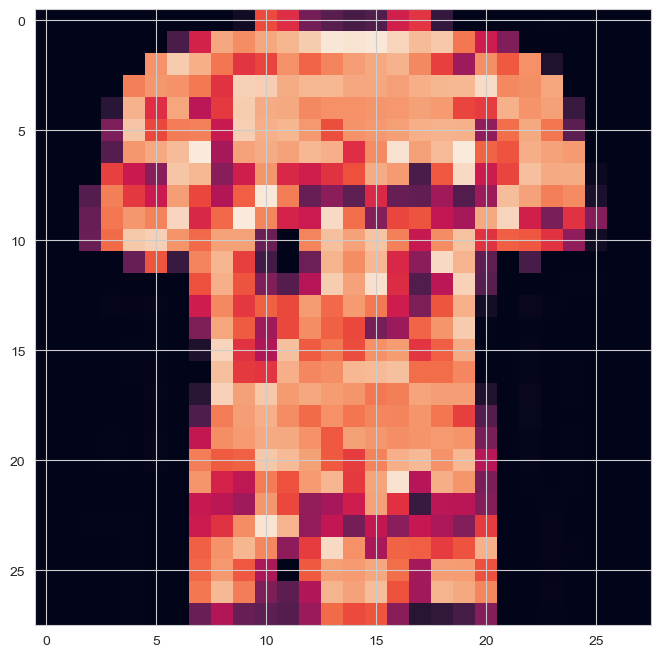

In [79]:
#Seeing the image of the predicted value
plt.imshow(x_test[400].reshape(28, 28))
plt.show()

In [80]:
#Changing the dim of the predicted value
pred_fashion2 = pre_model.predict(np.expand_dims(x_test[1000], 0))

1/1 [==============================] - 0s 17ms/step


In [82]:
np.argmax(pred_fashion2)

6

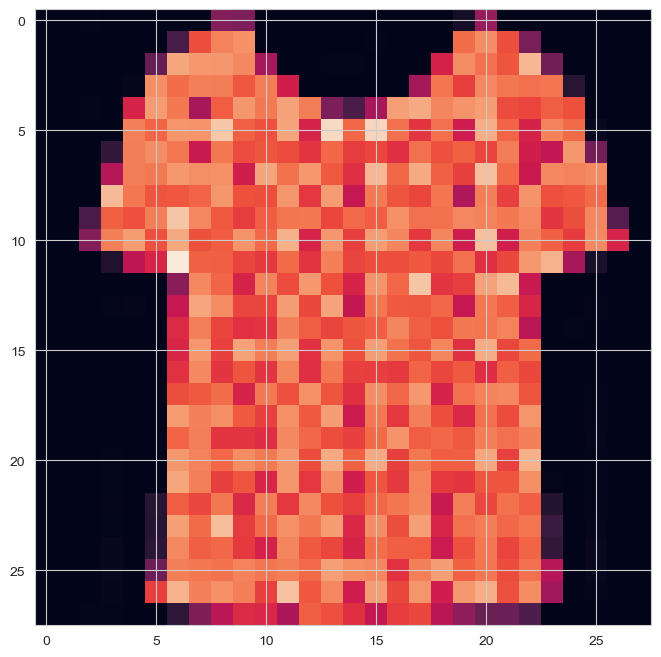

In [81]:
#Seeing the image of the predicted value
plt.imshow(x_test[1000].reshape(28, 28))
plt.show()

In [85]:
#Changing the dim of the predicted value
pred_fashion3 = pre_model.predict(np.expand_dims(x_test[5000], 0))

1/1 [==============================] - 0s 16ms/step


In [84]:
np.argmax(pred_fashion3)

6

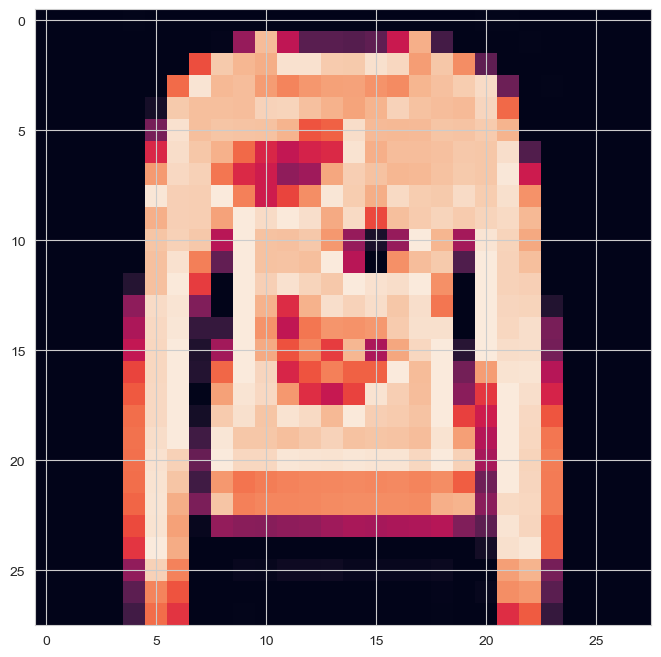

In [86]:
#Seeing the image of the predicted value
plt.imshow(x_test[5000].reshape(28, 28))
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___